# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [31]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
np.random.seed(999)

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


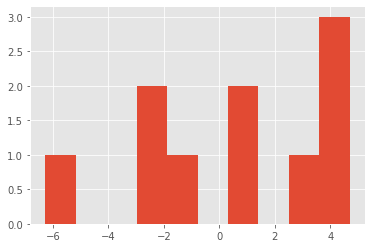

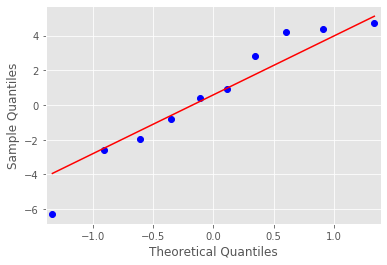

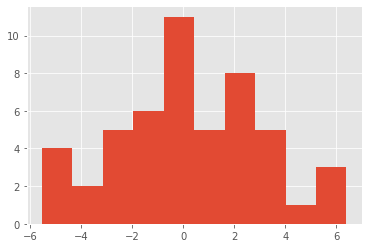

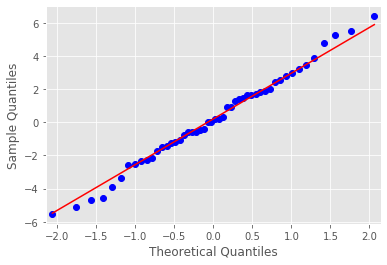

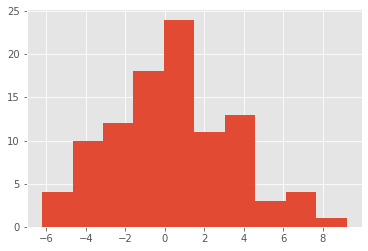

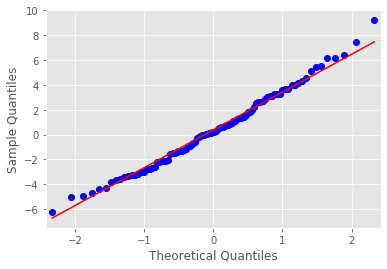

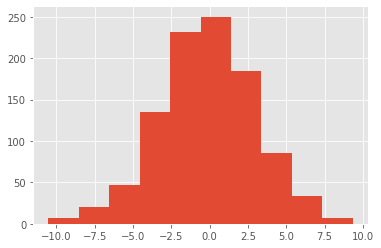

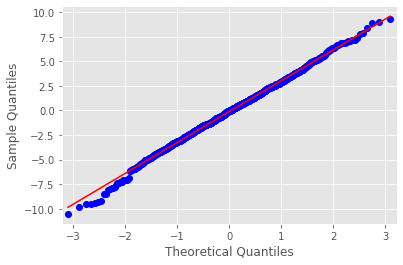

In [32]:

# histograms
plt.hist(x_10)
sm.qqplot(x_10, line='s')
plt.show()

plt.hist(x_50)
sm.qqplot(x_50, line='s')
plt.show()

plt.hist(x_100)
sm.qqplot(x_100, line='s')
plt.show()
plt.hist(x_1000)
sm.qqplot(x_1000, line='s')
plt.show()







In [33]:
# Plot histograms and Q-Q plots for above datasets



In [34]:
# Your comments here 
# I like the dist plot fo the high n.  Easy to see normality.  Could also make more bins.
# The QQ plot is easier to read, especially for the lower numbers n.  
#. You can see the individual points and how they vary from the line.

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

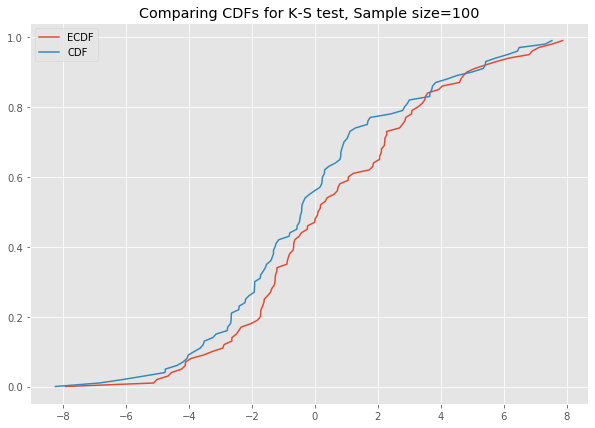

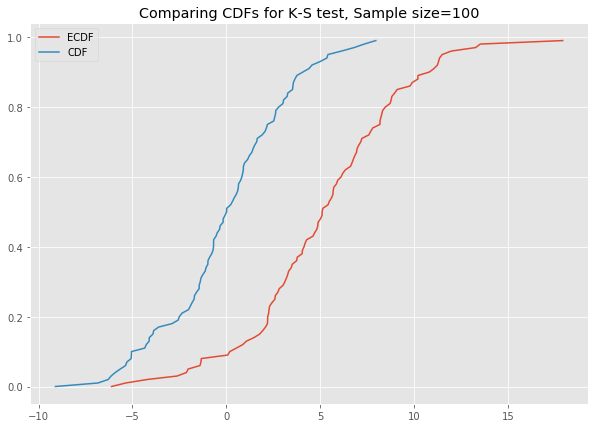

In [35]:
def ks_plot(data):

    plt.figure(figsize=(10, 7))
    #k-s requires sorting
    # data is on the x and a distribution from 0 to 1 even space is on the y.
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    
    # plot with known rvs set
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDFs for K-S test, Sample size=' + str(len(data)))
    

ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

# I screwed this one up when I did it.  Not too bad though.

This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

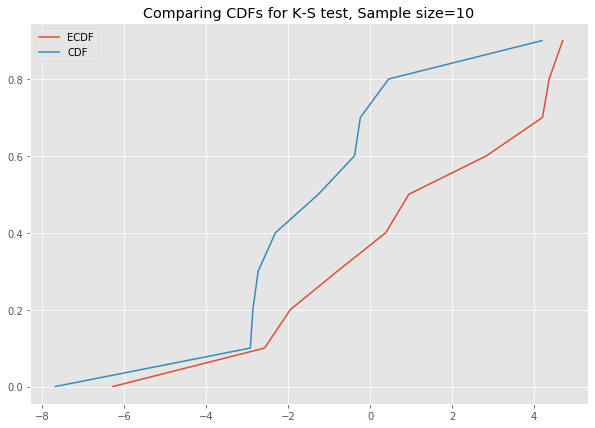

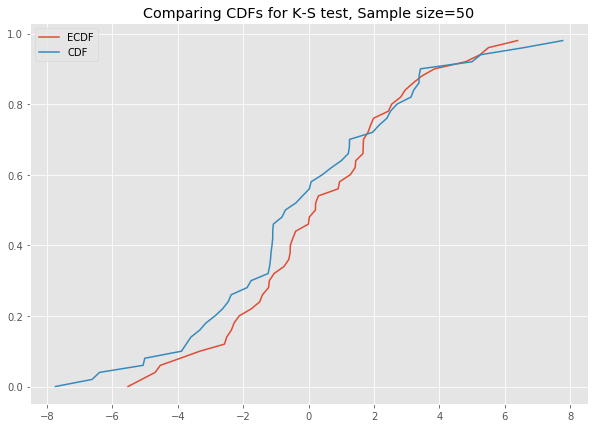

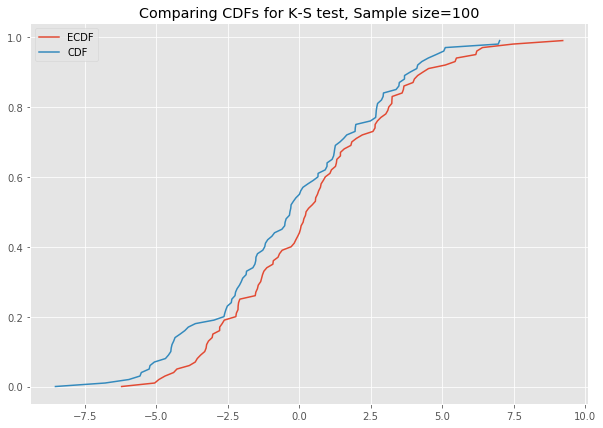

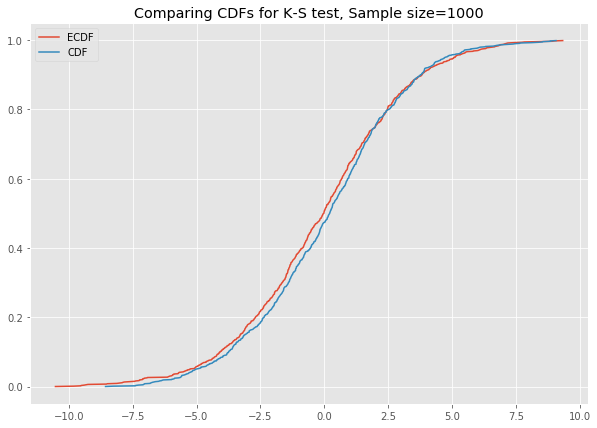

In [36]:
# Your code here 

ks_plot(x_10)
ks_plot(x_50)
ks_plot(x_100)
ks_plot(x_1000)


In [37]:
# Your comments here
# high number of samples gives clarity.  Lot of randomness in small data set.
# reminds me of college basketball game where they plot the score over time.

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [40]:
# Perform K-S test 
np.random.seed(999)


# Your code here 
# MINE IS WRONG????  # FORGOT RANDOM SEED DUMMY!!

stats.kstest(x_10, 'norm', args=(0,3))  # args are dist parameters (same as sets above 0 and 3)

np.random.seed(999)
for i in [x_10, x_50, x_100, x_1000]:
    print (stats.kstest(i, 'norm', args=(0, 3)))
    
    
# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

# my values were different but same result.  Not same seed for production of x_10X sets

KstestResult(statistic=0.22774545043649097, pvalue=0.6161842802064873)
KstestResult(statistic=0.07542771375133389, pvalue=0.9385405117109562)
KstestResult(statistic=0.07485354745873296, pvalue=0.6210804255190506)
KstestResult(statistic=0.02657438376208565, pvalue=0.47860755891628537)


In [39]:
# Your comments here 
# cannot reject the null hypothesis for any of them.  They appear to be from the same set.

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [116]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution

unicount = 0
normcount = 0

for i in range(20):
    x_uni = np.random.rand(1000)
    uni = stats.kstest(x_uni, 'uniform')
    norm = stats.kstest(x_uni, 'norm', args=(0, 3))
    if uni[1] < 0.05:
        # accept null hyp
        unicount += 1
    if norm[1] < 0.05:
        # accept null hyp
        normcount += 1
        
    
print(unicount, normcount)



# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

2 20


In [117]:
# THIS IS THE SOLUTION
x_uni = np.random.rand(1000)
# Try with a uniform distubtion
print(stats.kstest(x_uni, lambda x: x))
print(stats.kstest(x_uni, 'norm', args=(0, 3)))

KstestResult(statistic=0.019702209336437848, pvalue=0.8323882393432439)
KstestResult(statistic=0.5000902903869805, pvalue=8.66374688751062e-232)


In [63]:
# Your comments here 
# mine seems to line up with the numbers, but I did it a little differently.

# Basically...
# WHen you do a K-S test of uniform vs uniform, the pval is almost always bigger than alpha, so can't reject Ho
# K-S test of uniform vs normal, pval is about zero.  Must reject Ho.

# ONce in a while, it would accept null hyp for uniform vs uniform, but always rejected norm vs uni.

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

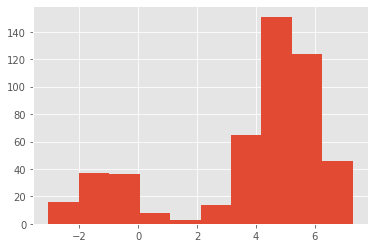

In [131]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);  # semicolon don't print nothin!

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

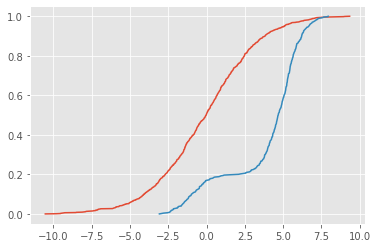

In [162]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    Compares two data sets so we can see the ks relationship.  Remember ks is the delta sort of between samples
    '''
    plt.plot(np.sort(data_1), np.linspace(0,1,len(data_1)))
    plt.plot(np.sort(data_2), np.linspace(0,1,len(data_2)))
    

# Uncomment below to run
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), 
                            np.random.normal(5, 1, int(0.4 * N))))



ks_plot_2sample(x_1000, x_1000_bi)


In [133]:
# You comments here 
# you can see th bimodal nature of the second plot.  Expect them not to match on a ks test

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [166]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi)
#x_1000_bi  # notice this stupid thing was concatenated weird.  Not sure why, but super annoying.
# my results were the same as below

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.634, pvalue=2.9976021664879227e-15)

In [ ]:
# Your comments here 
# The plot shows that the two samples are dissimilar and one would expect a small pvalue
# the 2sampResult shows a very small pvalue which agrees with the plot.
# Reject the null hypothesis.

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 